In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

mpl.rcParams['path.simplify'] = True
mpl.rcParams['path.simplify_threshold'] = 0.0

df = pd.read_csv(r"C:\Users\pc\Desktop\Case analysis - LBOBGDT\ArrowTechnologies - ArrowTechnologies.csv")
int_to_str = lambda x: str(x)
pd.set_option('display.precision', 2) #Rounding off decimals to the tenth position
df.columns = df.columns.str.replace(' ','_')#Removed spaces in column names for ease of use
df.columns = df.columns.str.replace('Certficates','Certificates') #Fixed the column name 'Certificates' misspelled as 'Certficates'
df.columns = df.columns.str.replace('Female','Sex') #Change column name to sex for ease of use
df['Sex'] = df['Sex'].replace({0 :'M', 1 : 'F'}) #Change numerical value of 'sex' to corresponding gender for ease of use
df['Referral_Score'] = df['Referral_Score'].replace({99 : 9, 100 : 10}) #Fixed 2 occurrences where 99 and 100 were found under Referral_Score
df['Personality'] = df['Personality'].str.replace('Diplomate','Diplomat') #Fixed an occurrence where 'Diplomat' is misspelled as 'Diplomate'
df = df[df.Business != 'Hardware'] #Removes those under the Hardware product group since they are not needed based on the problem
df.head()

,Sales_Rep,Business,Age,Sex,Years,College,Personality,Certificates,Feedback,Salary,Referral_Score,Unnamed:_11,Unnamed:_12
0,1.0,Software,35.0,M,1.0,Yes,Explorer,2.0,3.15,102000.0,7.0,NaN,NaN
1,2.0,Software,29.0,M,1.0,Yes,Explorer,1.0,3.80,85000.0,5.0,NaN,NaN
7,8.0,Software,51.0,F,10.0,No,Diplomat,2.0,1.65,51800.0,6.0,0,1
8,9.0,Software,24.0,M,4.0,Yes,Diplomat,2.0,3.73,85000.0,9.0,0,1
9,10.0,Software,35.0,F,2.0,Yes,Diplomat,5.0,2.04,70000.0,7.0,0,1


In [2]:
df.isnull().sum().head() #no duplicates

Sales_Rep    0
Business     0
Age          0
Sex          0
Years        0
dtype: int64

In [3]:
#Counts the number of personality types in those who scored less than 9 in referral scores, and averages the referral score per personality type 
filtered_rs1 = df[df['Referral_Score'] < 9]
df2 = filtered_rs1.groupby(['Personality'], sort = False ).agg({'Sales_Rep' : 'size', 'Referral_Score' : 'mean'})
df2.head(None)

,Sales_Rep,Referral_Score
Personality,,
Explorer,1500,5.87
Diplomat,1378,5.90
Analyst,633,4.63
Sentinel,793,4.62


In [4]:
#number of those had a referral score of less than 9 referral score and  less than 4 certificates
filtered_cert = filtered_rs1[filtered_rs1['Certificates'] <= 3]
df4 = filtered_cert.groupby(['Certificates','Personality'], sort = True ).agg({ 'Sales_Rep': 'size', 'Referral_Score' : 'mean'})
df4.head(None)

Sales_Rep  Referral_Score
Certificates Personality                           
0            Analyst             57            3.46
             Diplomat           149            4.94
             Explorer           140            4.91
             Sentinel            68            3.40
1            Analyst            123            3.95
             Diplomat           310            5.32
             Explorer           343            5.24
             Sentinel           161            3.77
2            Analyst            118            4.19
             Diplomat           292            5.73
             Explorer           352            5.82
             Sentinel           149            4.54
3            Analyst            129            4.84
             Diplomat           292            6.16
             Explorer           283            6.08
             Sentinel           177            4.84

In [5]:
#number of those had a referral score of less than 9 referral score and 4 or more certificates 
filtered_cert2 = filtered_rs1[filtered_rs1['Certificates'] >= 4] 
df5 = filtered_cert2.groupby(['Certificates','Personality'], sort = True ).agg({'Sales_Rep': 'size','Referral_Score' : 'mean'})
df5.head(None)

Sales_Rep  Referral_Score
Certificates Personality                           
4            Analyst            111            5.05
             Diplomat           178            6.61
             Explorer           202            6.57
             Sentinel           135            5.13
5            Analyst             70            5.93
             Diplomat           116            6.91
             Explorer           143            6.80
             Sentinel            76            5.76
6            Analyst             25            6.16
             Diplomat            41            7.24
             Explorer            37            6.68
             Sentinel            27            5.89

In [6]:
#Counts the number of personality types in those who scored 9 or more in referral scores, and averages the referral score per personality type.
filtered_rs2 = df[(df['Referral_Score'] == 9) | (df['Referral_Score'] == 10)]
df3 = filtered_rs2.groupby(['Personality'], sort = False ).agg({'Sales_Rep' : 'size', 'Referral_Score' : 'mean'})
df3.head(None)



,Sales_Rep,Referral_Score
Personality,,
Diplomat,520,9.37
Explorer,559,9.37
Sentinel,64,9.31
Analyst,40,9.15


In [7]:
#number of personality types where they have 9 or 10 referral score and less than 4 certificates
filtered_cert2 = filtered_rs2[filtered_rs2['Certificates'] <= 3]
df5 = filtered_cert2.groupby(['Certificates','Personality'], sort = True ).agg({'Sales_Rep': 'size','Referral_Score' : 'mean',})
df5.head(None)



Sales_Rep  Referral_Score
Certificates Personality                           
0            Diplomat             7            9.43
             Explorer             7            9.29
1            Analyst              2            9.00
             Diplomat            22            9.23
             Explorer            24            9.25
             Sentinel             1            9.00
2            Analyst              3            9.00
             Diplomat            63            9.27
             Explorer            80            9.36
             Sentinel             7            9.14
3            Analyst              1            9.00
             Diplomat            90            9.31
             Explorer           118            9.42
             Sentinel             6            9.33

In [8]:
#number of personality types where they have 9 or 10 referral score and more than 4 certificates
filtered_cert2 = filtered_rs2[filtered_rs2['Certificates'] >= 4]
df5 = filtered_cert2.groupby(['Certificates','Personality'], sort = True ).agg({'Sales_Rep': 'size','Referral_Score' : 'mean',})
df5.head(None)

Sales_Rep  Referral_Score
Certificates Personality                           
4            Analyst             15            9.13
             Diplomat           138            9.45
             Explorer           142            9.33
             Sentinel            17            9.35
5            Analyst             10            9.20
             Diplomat           134            9.40
             Explorer           127            9.34
             Sentinel            20            9.45
6            Analyst              9            9.22
             Diplomat            66            9.35
             Explorer            61            9.49
             Sentinel            13            9.15

In [9]:
#the salaries and the referral scores of sales reps in the software group depending on their personality types and sex.
df6 = df.groupby(['Personality','Sex'], sort = True).agg({'Sales_Rep': 'count', 'Salary': 'mean', 'Referral_Score' : 'mean',})
df6.head(None)

Sales_Rep    Salary  Referral_Score
Personality Sex                                     
Analyst     F          273  58068.86            4.94
            M          400  65827.50            4.87
Diplomat    F          805  73157.02            6.85
            M         1093  79027.45            6.85
Explorer    F          885  72005.42            6.90
            M         1174  80733.39            6.76
Sentinel    F          342  58625.15            5.04
            M          515  62825.24            4.92

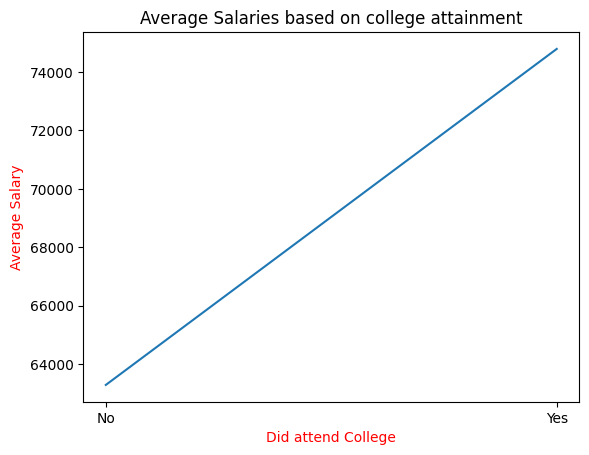

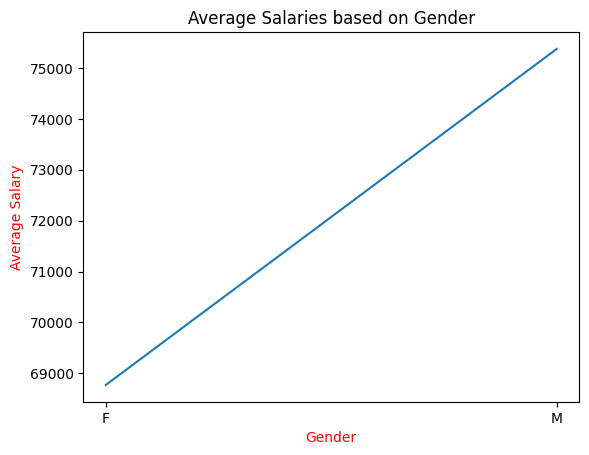

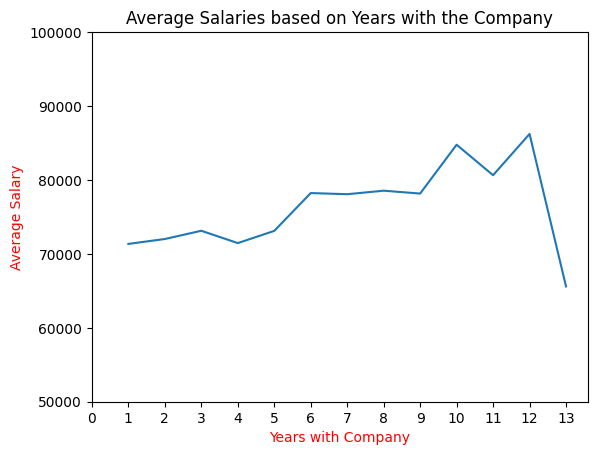

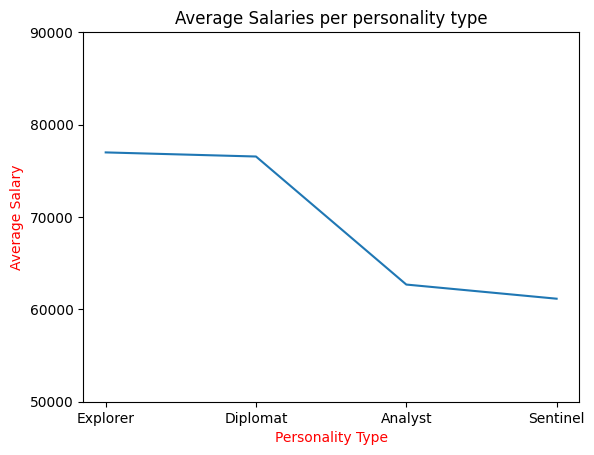

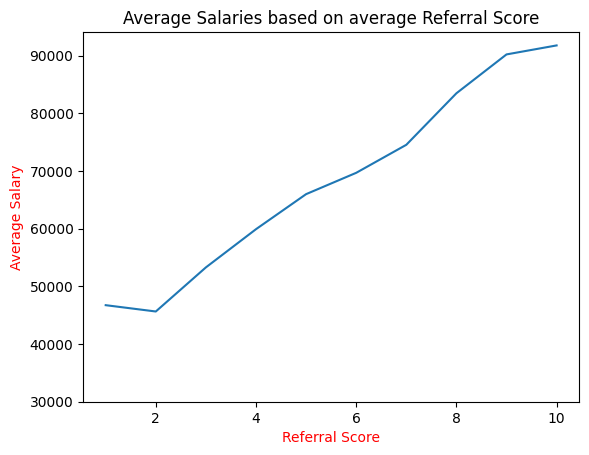

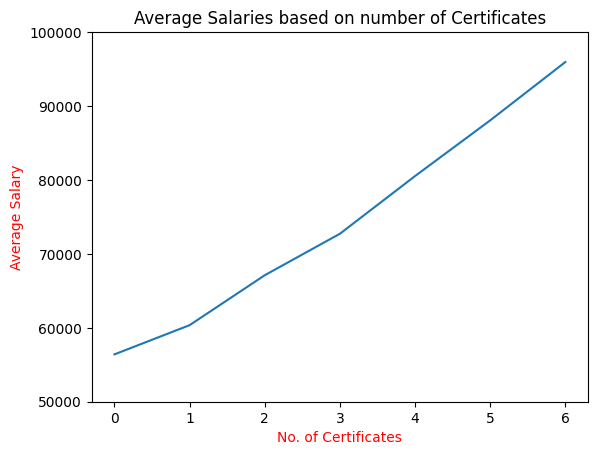

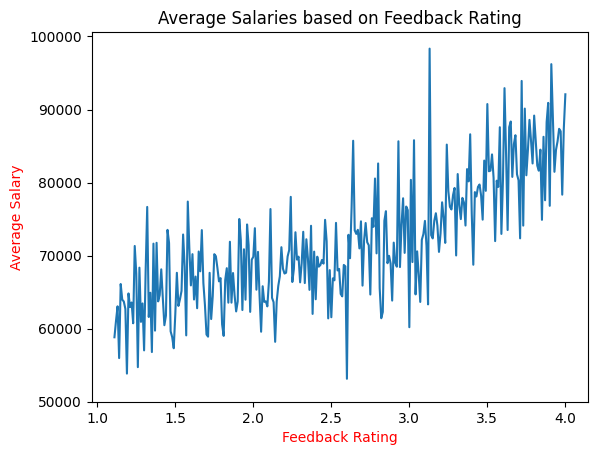

In [10]:
df29 = df.groupby(['College'], sort = True ).agg({'Salary' : 'mean'})
plt.plot(df29)
plt.xlabel("Did attend College", color = 'red')
plt.title("Average Salaries based on college attainment")
plt.ylabel("Average Salary",color = 'red'), 
plt.show()

df32 = df.groupby(['Sex'], sort = True ).agg({'Salary' : 'mean'})
plt.plot(df32)
plt.xlabel("Gender", color = 'red')
plt.title("Average Salaries based on Gender")
plt.ylabel("Average Salary",color = 'red'), 
plt.show()

df31 = df.groupby(['Years'], sort = True ).agg({'Salary' : 'mean'})
plt.plot(df31)
plt.yticks(np.arange(50000, 110000, 10000))
plt.xticks(np.arange(0, 14, 1))
plt.xlabel("Years with Company", color = 'red')
plt.title("Average Salaries based on Years with the Company")
plt.ylabel("Average Salary",color = 'red'), 
plt.show()

df26 = df.groupby(['Personality'], sort = False ).agg({'Salary' : 'mean'})
plt.plot(df26)
plt.yticks(np.arange(50000, 100000, 10000))
plt.xlabel("Personality Type", color = 'red')
plt.ylabel("Average Salary",color = 'red'),
plt.title("Average Salaries per personality type")
plt.show()

df27 = df.groupby(['Referral_Score'], sort = True ).agg({'Salary' : 'mean'})
plt.plot(df27)
plt.yticks(np.arange(30000, 100000, 10000))
plt.xlabel("Referral Score", color = 'red')
plt.ylabel("Average Salary",color = 'red'),
plt.title("Average Salaries based on average Referral Score")
plt.show()

df28 = df.groupby(['Certificates'], sort = True ).agg({'Salary' : 'mean'})
plt.plot(df28)
plt.yticks(np.arange(50000, 110000, 10000))
plt.xlabel("No. of Certificates", color = 'red')
plt.title("Average Salaries based on number of Certificates")
plt.ylabel("Average Salary",color = 'red'), 
plt.show()


df30 = df.groupby(['Feedback'], sort = True ).agg({'Salary' : 'mean'})
plt.plot(df30)
plt.yticks(np.arange(50000, 110000, 10000))
plt.xlabel("Feedback Rating", color = 'red')
plt.title("Average Salaries based on Feedback Rating")
plt.ylabel("Average Salary",color = 'red'), 
plt.show()



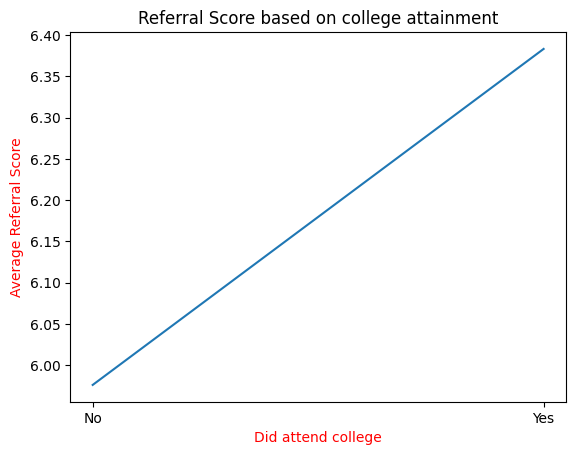

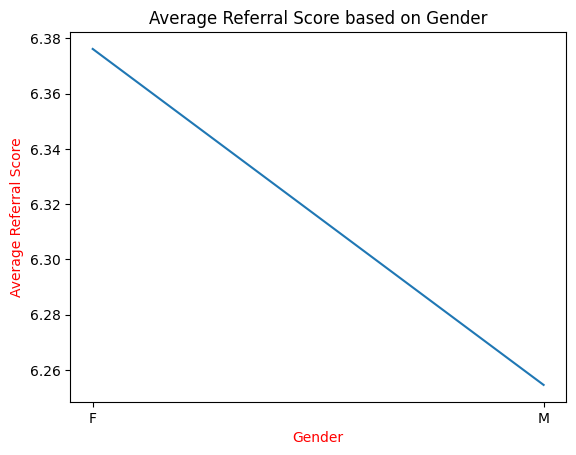

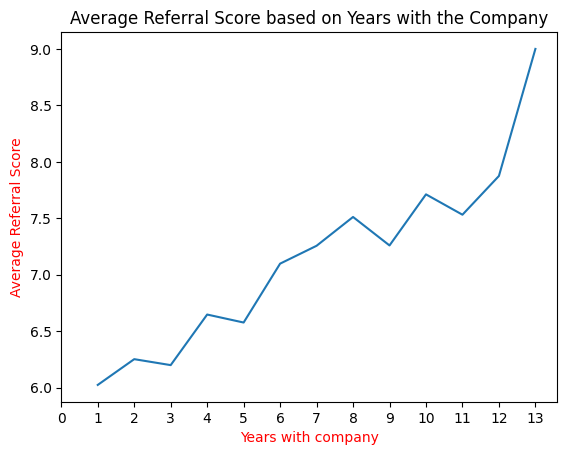

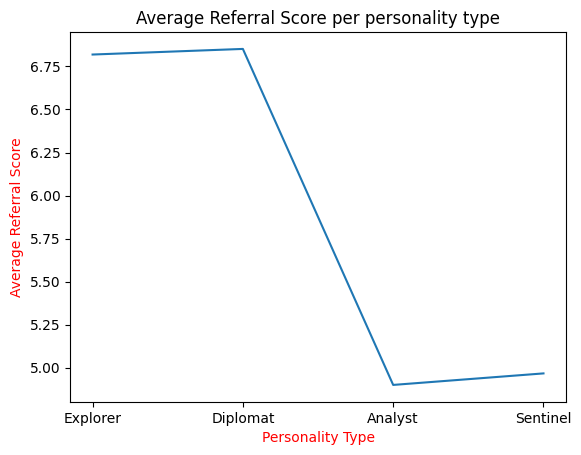

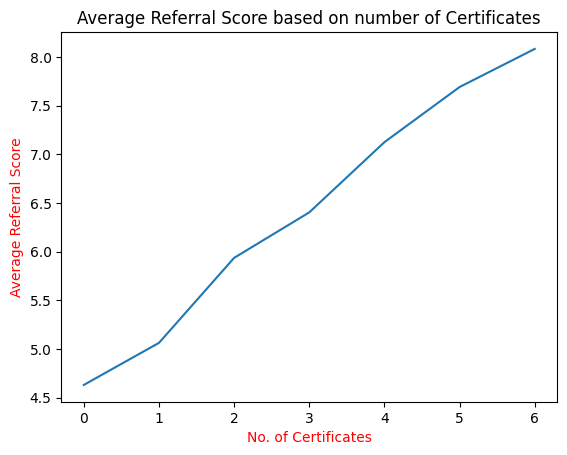

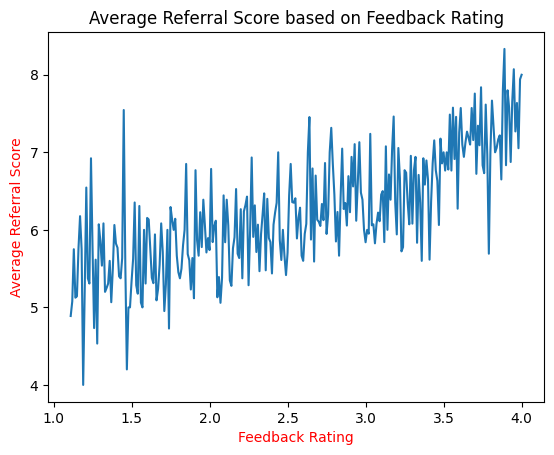

In [11]:
df29 = df.groupby(['College'], sort = True ).agg({'Referral_Score' : 'mean'})
plt.plot(df29)
plt.xlabel("Did attend college", color = 'red')
plt.title("Referral Score based on college attainment")
plt.ylabel("Average Referral Score",color = 'red'), 
plt.show()

df32 = df.groupby(['Sex'], sort = True ).agg({'Referral_Score' : 'mean'})
plt.plot(df32)
plt.xlabel("Gender", color = 'red')
plt.title("Average Referral Score based on Gender")
plt.ylabel("Average Referral Score",color = 'red'), 
plt.show()

df31 = df.groupby(['Years'], sort = True ).agg({'Referral_Score' : 'mean'})
plt.plot(df31)
plt.xticks(np.arange(0, 14, 1))
plt.xlabel("Years with company", color = 'red')
plt.title("Average Referral Score based on Years with the Company")
plt.ylabel("Average Referral Score",color = 'red'), 
plt.show()

df26 = df.groupby(['Personality'], sort = False ).agg({'Referral_Score' : 'mean'})
plt.plot(df26)
plt.xlabel("Personality Type", color = 'red')
plt.ylabel("Average Referral Score",color = 'red'),
plt.title("Average Referral Score per personality type")
plt.show()


df28 = df.groupby(['Certificates'], sort = True ).agg({'Referral_Score' : 'mean'})
plt.plot(df28)
plt.xlabel("No. of Certificates", color = 'red')
plt.title("Average Referral Score based on number of Certificates")
plt.ylabel("Average Referral Score",color = 'red'), 
plt.show()


df30 = df.groupby(['Feedback'], sort = True ).agg({'Referral_Score' : 'mean'})
plt.plot(df30)
plt.xlabel("Feedback Rating", color = 'red')
plt.title("Average Referral Score based on Feedback Rating")
plt.ylabel("Average Referral Score",color = 'red'), 
plt.show()